In [2]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import matplotlib
from matplotlib import cm
from IPython.display import display, Math, Latex

plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.style.use("ggplot")
opts = np.arange(-2, 2, 0.2)
vectors = np.array(
    [np.array(j).T for j in list(itertools.product(opts, opts))])

# Vectors overlap slightly further than the other person

def get_colors(v):
    if d < 1:
        return (100,0,0)
    else:
        return (0,0,100)


def plot_vectors(vectors, grey=False, alpha=0.6):
    """Quiver plot of np.array for two dimensional vectors"""
    # Color setup
    dots = range(len(vectors))
    norm = matplotlib.colors.Normalize(vmin=min(dots), vmax=max(dots), clip=False)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.RdBu)
    node_color = [(r, g, b) for r, g, b, a in mapper.to_rgba(dots,)]

    # Plot the 2d vector
    for i, v in enumerate(vectors):
        if grey:
            plt.quiver(v[0], v[1], color="grey", scale=8, alpha=alpha)
        else:
            plt.quiver(v[0], v[1], color=node_color[i], scale=8, alpha=alpha)


def plot_transformed_vectors(vectors, matrix,grey=False, alpha=0.6):
    """Plots transformed vectors using Ax = b. Matrix A must be mx2 dimensions."""
    # Color setup
    dots = range(len(vectors))
    norm = matplotlib.colors.Normalize(vmin=min(dots), vmax=max(dots), clip=False)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.RdBu)
    node_color = [(r, g, b) for r, g, b, a in mapper.to_rgba(dots,)]

    # Plot 2D tranformation Ax=b using A.dot(x)

    for i, v in enumerate(vectors):
        v = matrix.dot(v)
        if grey:
            plt.quiver(v[0], v[1], color="grey", scale=8, alpha=alpha)
        else:
            plt.quiver(v[0], v[1], color=node_color[i], scale=8, alpha=alpha)


# Linear Algebra with Numpy

Let's talk about vectors as points in space and matrices as transformations that can be applied to the point to transform it into another point.

The two dimensional plan can be described by the orthonormal basis vectors v1 and v2.

$$ v_1 = \begin{bmatrix}1\\ 0 \end{bmatrix}    v_2 =  \begin{bmatrix}0\\ 1 \end{bmatrix}$$

$$ \text{Any vector in 2 dimensional space can be expressed as a combination of } v_1 \text{ and } v_2$$

$$ \text{The vector } x = \begin{bmatrix} -3 \\ 9 \end{bmatrix}  \text{can be expressed as } (-3v_1) + (9 v_2)$$

$$\text{The orthonormal matrix that is composed of} v_1 \text{ and } v_2 \text{ (also known as basis vectors) is} \\ M=\begin{bmatrix} 1&0 \\ 0&1 \end{bmatrix}  $$

In our special case where our orthonormal basis vectors are the way they are, our orthonormal matrix is also a symetric identity matrix. This means that any two dimensional column vector that we multiple by our matrix `M` will leave the original vector equal to itself.  Sometimes we can also need to talk about our equivalent point in another space that is an affine transformation of our orthonormal basis vectors in 2 dimensions. If we had identical images that have been taken at different heights, then every part of smaller image will have a corresponding part in the larger image where every point will be expanded outwards. The action of moving your camera up or down on an object is mathemtically equivalent to multypling a *stretching* matrix to every single point in our original smaller image.


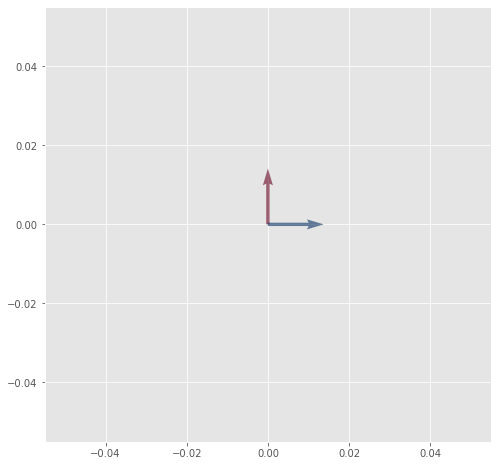

In [3]:
# Orthonormal basis
plot_vectors(
    np.array([
        [0,1],
        [1,0]
    ])
)

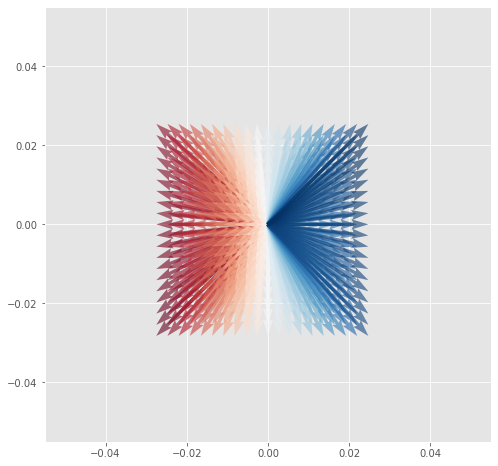

In [4]:
plot_vectors(vectors)


plt.show()

<IPython.core.display.Math object>

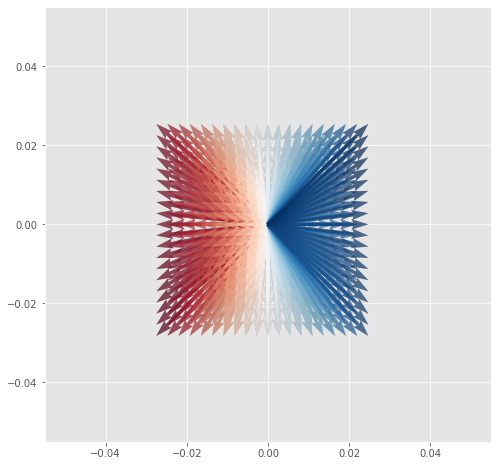

In [5]:
f = 3
identity = np.identity(2)

display(Math(r'''\begin{bmatrix}1 & 0\\ 0 & 1 \end{bmatrix}x = y'''))

plot_vectors(vectors, grey=True)
plot_transformed_vectors(vectors, identity)
plt.show()

<IPython.core.display.Math object>

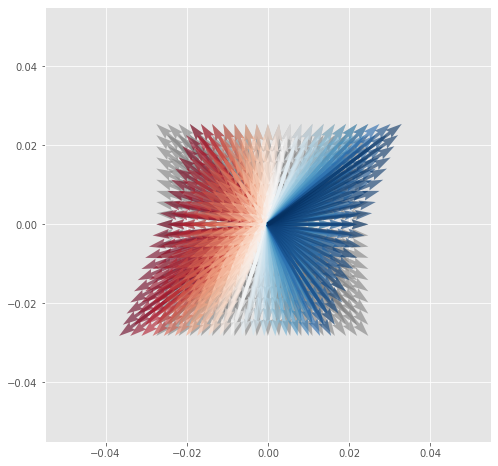

In [6]:
f = 3
shear = np.array([[1, 1 / f], [0, 1]])

display(Math(r'''\begin{bmatrix}1 & \frac{1}{f}\\ 0 & 1 \end{bmatrix}x = y'''))

plot_vectors(vectors, grey=True)
plot_transformed_vectors(vectors, shear)
plt.show()

<IPython.core.display.Math object>

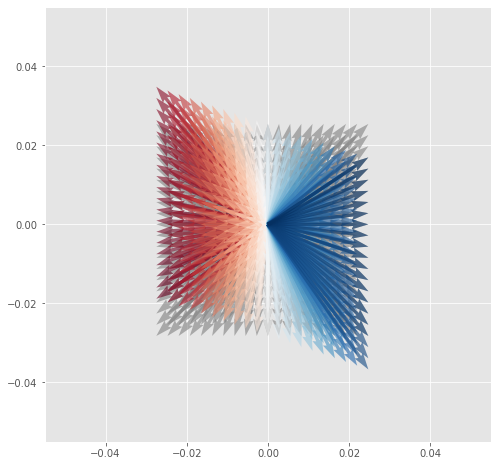

In [7]:
f = -3
shear = np.array([[1, 0], [1/f, 1]])

display(Math(r'''\begin{bmatrix}1 & 0\\ \frac{1}{f} & 1 \end{bmatrix}'''))

plot_vectors(vectors, grey=True)
plot_transformed_vectors(vectors, shear)
plt.show()

<IPython.core.display.Math object>

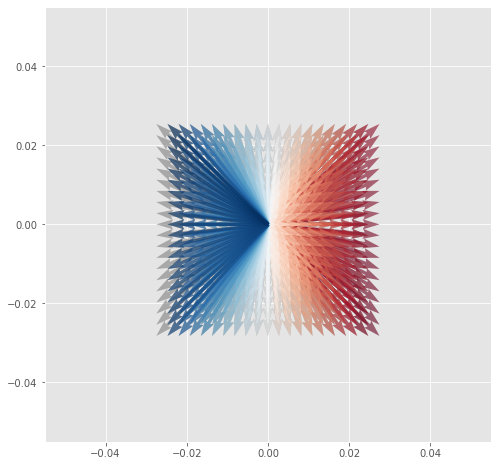

In [8]:

reflection = np.array([[-1,0], [0, 1]])

display(Math(r'''\begin{bmatrix}-1 & 0\\ 0 & 1 \end{bmatrix}'''))
plot_vectors(vectors, grey=True)
plot_transformed_vectors(vectors, reflection)
plt.show()

<IPython.core.display.Math object>

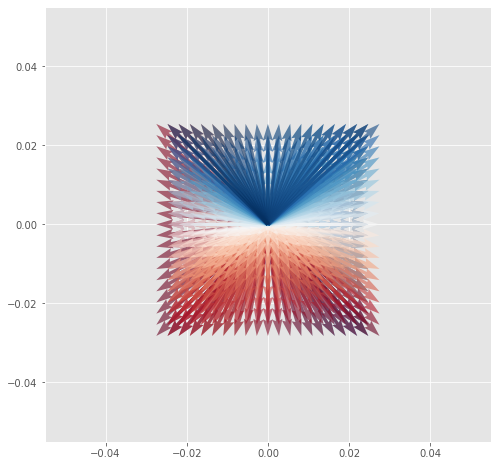

In [9]:
theta = np.pi/2 # 22.6 degrees counter clock-wise

rotation = np.array([[np.cos(theta), -1 * np.sin(theta)],
                     [np.sin(theta), np.cos(theta)]])


display(Math(r'''\begin{bmatrix}\cos(\theta) & -\sin(\theta)\\ \sin(\theta) & \cos(\theta) \end{bmatrix}'''))

plot_vectors(vectors, grey=False)
plot_transformed_vectors(vectors, rotation)
plt.show()

<IPython.core.display.Math object>

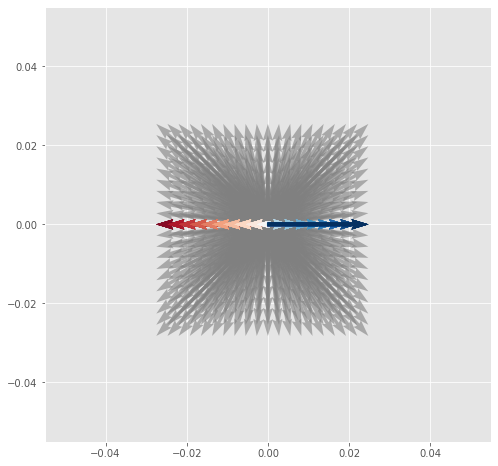

In [10]:
m = np.array([[1, 0], [0, 0]])
# This is a special matrix. It is not invertible. There is no way of going back to the second dimension from the projected first dimension.

m = np.array([[1, 0], [0, 0]])
# This is a special matrix. It is not invertible. There is no way of going back to the second dimension from the projected first dimension.
display(Math(r'''\begin{bmatrix}1 & 0\\ 0 & 0\end{bmatrix}'''))

plot_vectors(vectors, grey=True)
plot_transformed_vectors(vectors, m)

plt.show()

$$ \begin{bmatrix}0.92387953 & -0.07472359\\ 0.38268343 & 1.05144068\end{bmatrix} $$

<IPython.core.display.Math object>

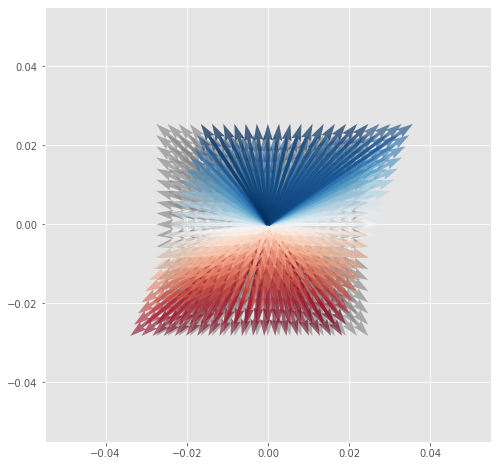

In [11]:
sr = rotation @ shear
display(Math(r'''\begin{bmatrix}0.92 & -0.07\\ 0.38 & 1.05\end{bmatrix}'''))

plot_vectors(vectors, grey=True)
plot_transformed_vectors(vectors, sr)

plt.show()

<IPython.core.display.Math object>

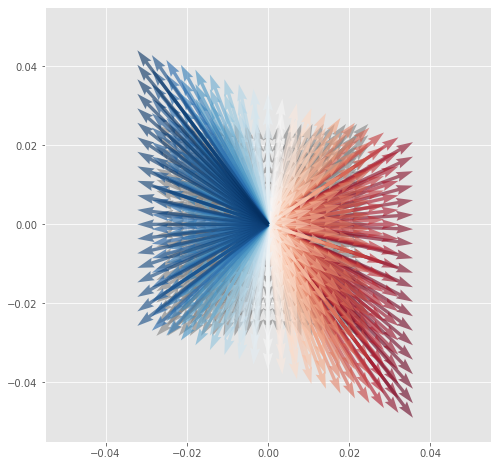

In [12]:
sr = shear @ reflection @ (np.identity(2)*1.3)

plot_vectors(vectors, grey=True)
plot_transformed_vectors(vectors, sr)
display(Math(r'''\begin{bmatrix}-1.3 & 0.4333\\ 0 & 1.3\end{bmatrix}'''))
plt.show()

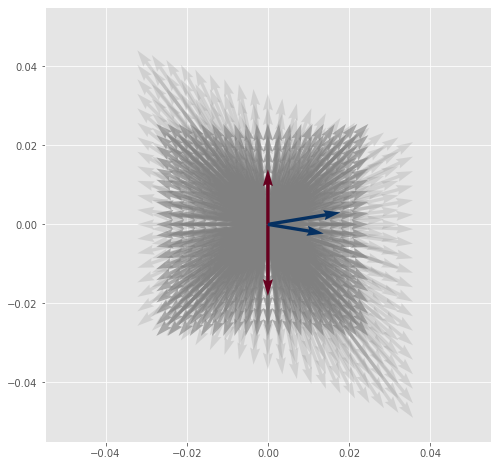

In [13]:
eigens =  np.linalg.eig(sr)

evectors = eigens[1]
evalues = eigens[0]


plot_vectors(vectors,grey=True,alpha=0.6)
plot_transformed_vectors(vectors, sr, grey=True, alpha=0.2)

plot_vectors(evalues * evectors, grey=False,alpha=1)
plot_vectors(evectors, grey=False,alpha=1)

<IPython.core.display.Math object>

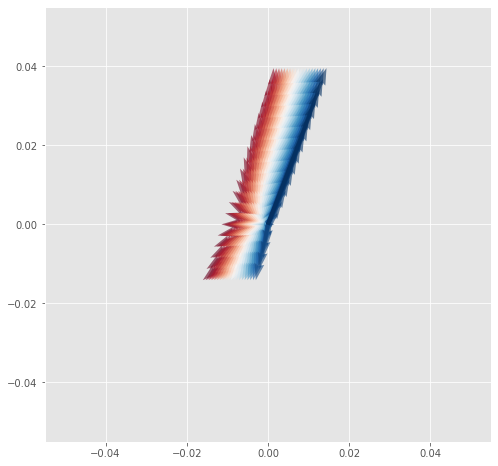

In [16]:
# Homographic Projection
display(Math(r'''\begin{bmatrix}a & b & c\\d & e & f\end{bmatrix}'''))


H = np.array(
    [[1/4,1/3,0],
    [0,1,1],
    [1/3,2,1.8]]
)
vectors_3d = [np.append(v,1) for v in vectors]

projected = []
for v in vectors_3d:
    vprime = H @ v
    
    projected.append(
        vprime
    )

plot_vectors(projected)


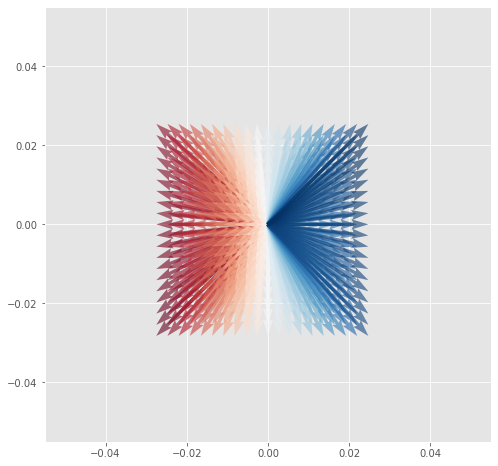

In [17]:
originals = []
inverse = np.linalg.inv(H)
for v in projected:
    v_ = inverse @ v
    
    originals.append(
        v_
    )

plot_vectors(originals)